<a href="https://colab.research.google.com/github/gabrielablm/Desafio-Oncase/blob/main/Desafio_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='green'>Processo Seletivo Oncase </font>

Gabriela Leal | Fevereiro de 2023

## **Macro Tarefa 01: Análise descritiva dos dados (EDA)**

  1. Construa uma análise descritiva extraindo conhecimento das variáveis e apresentando quais insights podem ser obtidos a partir delas;

  2. Mostre-nos um caminho para selecionar graficamente as variáveis mais ou menos importantes para cada problema, como elas se relacionam e porquê.

  3. Em cada problema descreva quais outras técnicas poderiam ser aplicadas e porquê você não as escolheu.

  4. Utilize os dados: eda_receitas_data.zip




## 1.1 Leitura e processamento do arquivo

In [ ]:
# Importando bibliotecas necessárias
import io
import pandas as pd
import numpy as np
import missingno as msno
from google.colab import files

# Inserindo o arquivo 'receitas.json'
uploaded = files.upload()

Saving receitas.json to receitas.json


In [ ]:
# Lendo o arquivo e salvando o dataset em uma variável
df = pd.read_json(io.StringIO(uploaded.get('receitas.json').decode('utf-8')))

# Verificando se o arquivo foi inserido corretamente
df

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0
...,...,...,...,...,...,...,...,...,...,...,...
20125,[Beat whites in a bowl with an electric mixer ...,2.0,2004-08-20 04:00:00+00:00,"[Mixer, Cheese, Egg, Fry, Cocktail Party, Parm...",28.0,None,2.0,3.125,Parmesan Puffs,"[2 large egg whites, 3 oz Parmigiano-Reggiano,...",64.0
20126,[Bring broth to simmer in saucepan.Remove from...,28.0,2008-02-28 22:06:54+00:00,"[Side, Kid-Friendly, High Fiber, Dinner, Parme...",671.0,Cooking the artichokes with the rice infuses t...,22.0,4.375,Artichoke and Parmesan Risotto,"[5 1/2 cups (or more) low-salt chicken broth, ...",583.0
20127,"[Using a sharp knife, cut a shallow X in botto...",38.0,2005-10-21 18:21:20+00:00,"[Onion, Poultry, turkey, Vegetable, Bake, Kid-...",563.0,None,31.0,4.375,Turkey Cream Puff Pie,"[1 small tomato, 1 small onion, finely chopped...",652.0
20128,[Heat 2 tablespoons oil in heavy medium skille...,24.0,2004-08-20 04:00:00+00:00,"[Milk/Cream, Citrus, Dairy, Fish, Garlic, Past...",631.0,"Sharon Hooykaas of Los Alamitos, California, w...",45.0,4.375,Snapper on Angel Hair with Citrus Cream,"[4 tablespoons olive oil, 4 shallots, thinly s...",517.0


## 1.2 Explorando e exibindo informações iniciais dos dados

In [ ]:
print(f"Número de registros (linhas): {(df.shape[0])}")
print(f"Número de variáveis (colunas): {format(df.shape[1])} \n")

Número de registros (linhas): 20130
Número de variáveis (colunas): 11 



In [ ]:
print("Lista dos tipos de dados do dataset:")
df.info()

Lista dos tipos de dados do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   20111 non-null  object             
 1   fat          15908 non-null  float64            
 2   date         20111 non-null  datetime64[ns, UTC]
 3   categories   20111 non-null  object             
 4   calories     15976 non-null  float64            
 5   desc         13495 non-null  object             
 6   protein      15929 non-null  float64            
 7   rating       20100 non-null  float64            
 8   title        20111 non-null  object             
 9   ingredients  20111 non-null  object             
 10  sodium       15974 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.7+ MB


In [ ]:
print("Lista das 5 primeiras linhas do dataset:")
df.head(5)

Lista das 5 primeiras linhas do dataset:


,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0


In [ ]:
print("Lista das 5 ultimas linhas do dataset:")
df.tail(5)

Lista das 5 ultimas linhas do dataset:


,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
20125,[Beat whites in a bowl with an electric mixer ...,2.0,2004-08-20 04:00:00+00:00,"[Mixer, Cheese, Egg, Fry, Cocktail Party, Parm...",28.0,None,2.0,3.125,Parmesan Puffs,"[2 large egg whites, 3 oz Parmigiano-Reggiano,...",64.0
20126,[Bring broth to simmer in saucepan.Remove from...,28.0,2008-02-28 22:06:54+00:00,"[Side, Kid-Friendly, High Fiber, Dinner, Parme...",671.0,Cooking the artichokes with the rice infuses t...,22.0,4.375,Artichoke and Parmesan Risotto,"[5 1/2 cups (or more) low-salt chicken broth, ...",583.0
20127,"[Using a sharp knife, cut a shallow X in botto...",38.0,2005-10-21 18:21:20+00:00,"[Onion, Poultry, turkey, Vegetable, Bake, Kid-...",563.0,None,31.0,4.375,Turkey Cream Puff Pie,"[1 small tomato, 1 small onion, finely chopped...",652.0
20128,[Heat 2 tablespoons oil in heavy medium skille...,24.0,2004-08-20 04:00:00+00:00,"[Milk/Cream, Citrus, Dairy, Fish, Garlic, Past...",631.0,"Sharon Hooykaas of Los Alamitos, California, w...",45.0,4.375,Snapper on Angel Hair with Citrus Cream,"[4 tablespoons olive oil, 4 shallots, thinly s...",517.0
20129,[Position rack in bottom third of oven and pre...,10.0,2004-08-20 04:00:00+00:00,"[Pork, Bake, Roast, Christmas, Ham, Winter, Bo...",560.0,"Although labeled fully cooked, the ham will st...",73.0,4.375,Baked Ham with Marmalade-Horseradish Glaze,"[1 18-pound fully cooked bone-in smoked ham, r...",3698.0


In [ ]:
print("Informações estatísticas dos dados numéricos do dataset:")
df.describe()

Informações estatísticas dos dados numéricos do dataset:


,fat,calories,protein,rating,sodium
count,1.590800e+04,1.597600e+04,15929.000000,20100.000000,1.597400e+04
mean,3.460975e+02,6.307857e+03,99.946199,3.713060,6.211474e+03
std,2.043102e+04,3.585851e+05,3835.616663,1.343144,3.328903e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,7.000000e+00,1.980000e+02,3.000000,3.750000,8.000000e+01
50%,1.700000e+01,3.310000e+02,8.000000,4.375000,2.940000e+02
75%,3.300000e+01,5.860000e+02,27.000000,4.375000,7.110000e+02
max,1.722763e+06,3.011122e+07,236489.000000,5.000000,2.767511e+07


## 1.3 Tranformação e Limpeza dos dados

In [ ]:
# Convertendo colunas do tipo lista para lista de string
df["directions"] = df["directions"].apply(str)
df["categories"] = df["categories"].apply(str)
df["ingredients"] = df["ingredients"].apply(str)

# Verificando se a conversão foi feita corretamente
df

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"['1. Place the stock, lentils, celery, carrot,...",7.0,2006-09-01 04:00:00+00:00,"['Sandwich', 'Bean', 'Fruit', 'Tomato', 'turke...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap",['4 cups low-sodium vegetable or chicken stock...,559.0
1,['Combine first 9 ingredients in heavy medium ...,23.0,2004-08-20 04:00:00+00:00,"['Food Processor', 'Onion', 'Pork', 'Bake', 'B...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"['1 1/2 cups whipping cream', '2 medium onions...",1439.0
2,['In a large heavy saucepan cook diced fennel ...,7.0,2004-08-20 04:00:00+00:00,"['Soup/Stew', 'Dairy', 'Potato', 'Vegetable', ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"['1 fennel bulb (sometimes called anise), stal...",165.0
3,['Heat oil in heavy large skillet over medium-...,NaN,2009-03-27 04:00:00+00:00,"['Fish', 'Olive', 'Tomato', 'Sauté', 'Low Fat'...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"['2 tablespoons extra-virgin olive oil', '1 cu...",NaN
4,['Preheat oven to 350°F. Lightly grease 8x8x2-...,32.0,2004-08-20 04:00:00+00:00,"['Cheese', 'Dairy', 'Pasta', 'Vegetable', 'Sid...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"['1 12-ounce package frozen spinach soufflé, t...",452.0
...,...,...,...,...,...,...,...,...,...,...,...
20125,['Beat whites in a bowl with an electric mixer...,2.0,2004-08-20 04:00:00+00:00,"['Mixer', 'Cheese', 'Egg', 'Fry', 'Cocktail Pa...",28.0,None,2.0,3.125,Parmesan Puffs,"['2 large egg whites', '3 oz Parmigiano-Reggia...",64.0
20126,['Bring broth to simmer in saucepan.Remove fro...,28.0,2008-02-28 22:06:54+00:00,"['Side', 'Kid-Friendly', 'High Fiber', 'Dinner...",671.0,Cooking the artichokes with the rice infuses t...,22.0,4.375,Artichoke and Parmesan Risotto,['5 1/2 cups (or more) low-salt chicken broth'...,583.0
20127,"['Using a sharp knife, cut a shallow X in bott...",38.0,2005-10-21 18:21:20+00:00,"['Onion', 'Poultry', 'turkey', 'Vegetable', 'B...",563.0,None,31.0,4.375,Turkey Cream Puff Pie,"['1 small tomato', '1 small onion, finely chop...",652.0
20128,['Heat 2 tablespoons oil in heavy medium skill...,24.0,2004-08-20 04:00:00+00:00,"['Milk/Cream', 'Citrus', 'Dairy', 'Fish', 'Gar...",631.0,"Sharon Hooykaas of Los Alamitos, California, w...",45.0,4.375,Snapper on Angel Hair with Citrus Cream,"['4 tablespoons olive oil', '4 shallots, thinl...",517.0


### **1.3.1 Identificando dados duplicados**

In [ ]:
# Indentificando a quantidade de dados duplicados
df.duplicated().sum()

# Removendo dados que estejam iguais em todas as colunas do dataset
df = df.drop_duplicates(subset = df.columns)

In [ ]:
print(f"O dataset sem os valores duplicados é composto por {df.shape[0]} linhas e {df.shape[1]} colunas")

O dataset sem os valores duplicados é composto por 18296 linhas e 11 colunas


### **1.3.2 Identificando dados faltantes**

In [ ]:
print("Quantidade de dados faltantes por coluna no dataset:")
df.isnull().sum().sort_values(ascending=False)

Quantidade de dados faltantes por coluna no dataset:


desc           6082
fat            3817
protein        3797
sodium         3765
calories       3764
rating           11
date              1
title             1
directions        0
categories        0
ingredients       0
dtype: int64

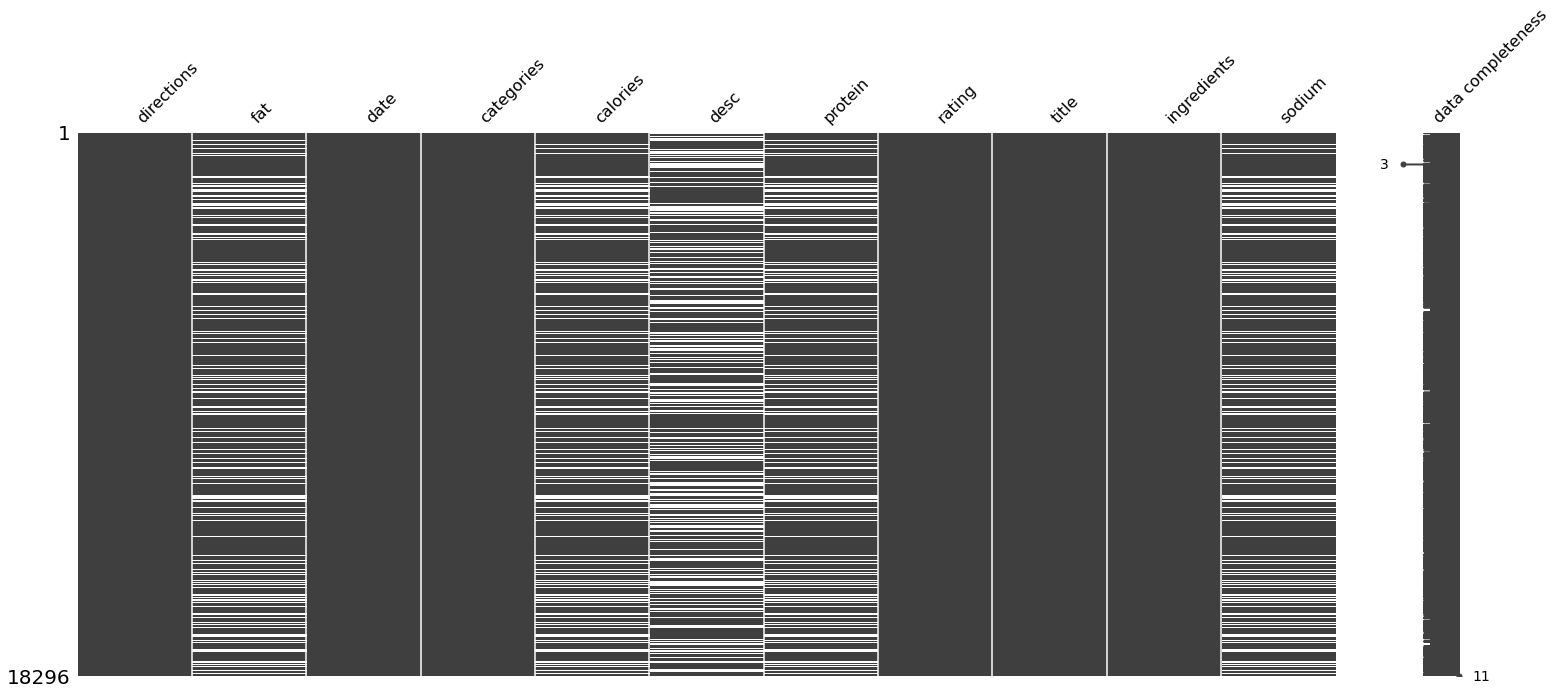

In [ ]:
# Imprimindo a matriz de dados faltantes
msno.matrix(df, labels=True)

Obs.: Embora tenham sido identificados valores faltantes em algumas colunas, optou-se por não remover nenhum dos registros que apresentam valores 'NaN' do dataset.

### **1.3.3 Identificando valores númericos**

In [ ]:
print("Tipos de dados do dataset:")
df.dtypes

Tipos de dados do dataset:


directions                  object
fat                        float64
date           datetime64[ns, UTC]
categories                  object
calories                   float64
desc                        object
protein                    float64
rating                     float64
title                       object
ingredients                 object
sodium                     float64
dtype: object

Obs.: O dataset apresenta todas as colunas com o tipo de dado correto para os registros que armazenam.

### **1.3.4 Identificando outliers**

In [ ]:
print("Dados estatísticos básicos do dataset:")
df.describe()

Dados estatísticos básicos do dataset:


,fat,calories,protein,rating,sodium
count,1.447900e+04,1.453200e+04,14499.000000,18285.000000,1.453100e+04
mean,3.627313e+02,6.609487e+03,92.074281,3.713187,6.561556e+03
std,2.133631e+04,3.743950e+05,3508.244063,1.335423,3.480575e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,8.000000e+00,2.050000e+02,3.000000,3.750000,8.800000e+01
50%,1.800000e+01,3.450000e+02,9.000000,4.375000,3.040000e+02
75%,3.400000e+01,5.990000e+02,28.000000,4.375000,7.320000e+02
max,1.722763e+06,3.011122e+07,236489.000000,5.000000,2.767511e+07


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


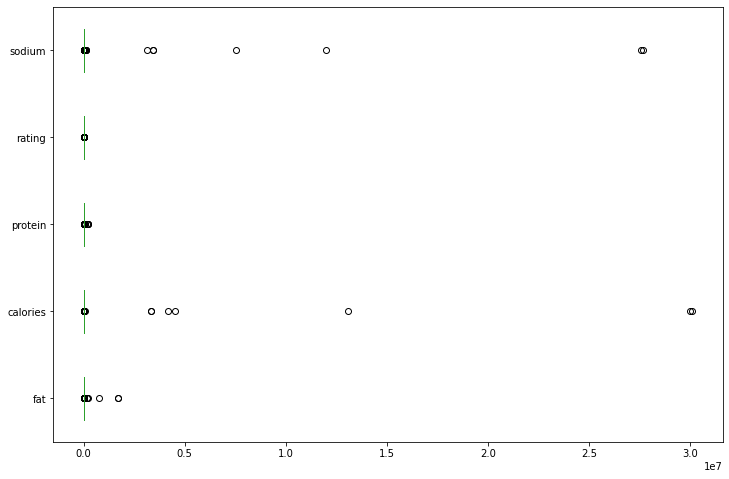

In [ ]:
# Plotando boxplot para observar a distribuição dos dados
df.boxplot(figsize=(12,8), grid=False, vert=False)

Obs.: Como os valores apresentados como outliers no boxplot apareceram em maior quantidade nas features 'calories' e 'sodium', optou-se por aplicar o metodo amplitude interquartil apenas nestas duas features.

Método Amplitude interquartil

feature 'calories'

In [ ]:
# Analisando a amplitude interquartil para a feature calories
q1_calories = df.calories.quantile(.25)
q3_calories = df.calories.quantile(.75)
Amp_interquartil = q3_calories - q1_calories

print("CALORIES:")
print("Primeiro Quartil:", q1_calories)
print("Terciro Quartil:", q3_calories)
print("Amplitude interquatil:", Amp_interquartil, "\n")

# Determinando o limite inferior e superior
limite_inferior = q1_calories - (1.5 * Amp_interquartil)
limite_superior = q3_calories + (1.5 * Amp_interquartil)

print("Limite Inferior da feature calories: ", limite_inferior)
print("Limite Superior da feature calories: ", limite_superior)

CALORIES:
Primeiro Quartil: 205.0
Terciro Quartil: 599.0
Amplitude interquatil: 394.0 

Limite Inferior da feature calories:  -386.0
Limite Superior da feature calories:  1190.0


In [ ]:
# Verificando se existem dados fora dos limites encontrados da feature calories
outliers = len(df[(df.calories < limite_inferior) | (df.calories > limite_superior)])
print(f"Número de outliers da feature calories: {outliers}")

Número de outliers da feature calories: 907


feature 'sodium'

In [ ]:
# Analisando a amplitude interquartil para a feature sodium
q1_sodium = df.sodium.quantile(.25)
q3_sodium = df.sodium.quantile(.75)
Amp_interquartil = q3_sodium - q1_sodium

print("SODIUM:")
print("Primeiro Quartil:", q1_sodium)
print("Terciro Quartil:", q3_sodium)
print("Amplitude interquatil:", Amp_interquartil, "\n")

# Determinando o limite inferior e superior
limite_inferior = q1_sodium - (1.5 * Amp_interquartil)
limite_superior = q3_sodium + (1.5 * Amp_interquartil)

print("Limite Inferior da feature sodium: ", limite_inferior)
print("Limite Superior da feature sodium: ", limite_superior)

SODIUM:
Primeiro Quartil: 88.0
Terciro Quartil: 732.0
Amplitude interquatil: 644.0 

Limite Inferior da feature sodium:  -878.0
Limite Superior da feature sodium:  1698.0


In [ ]:
# Verificando se existem dados fora dos limites encontrados da feature sodium
outliers = len(df[(df.sodium < limite_inferior) | (df.sodium > limite_superior)])
print(f"Número de outliers da feature sodium: {outliers}")

Número de outliers da feature sodium: 1040


Obs.: Embora tenham sido identificados outliers, optou-se por não remove-los do dataset.

## 1.4 Observando a distribuição dos dados

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff41986dcd0>,
      dtype=object)

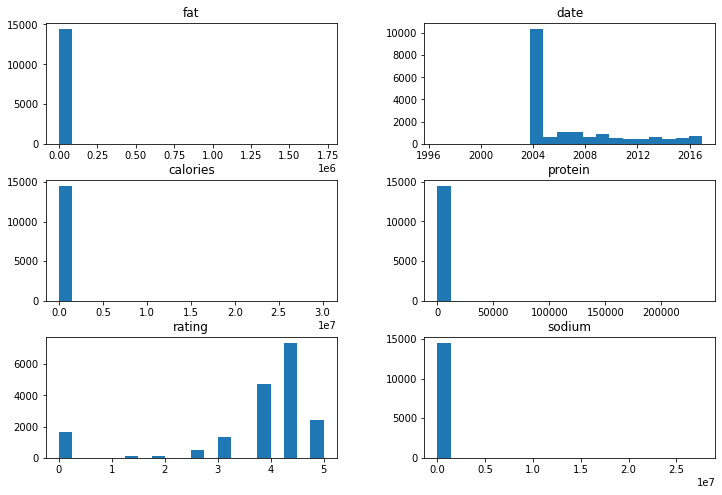

In [ ]:
# Plotando histograma para observar a distribuição dos dados
df.hist(figsize=(12,8), bins=20, grid=False)

Obs.: Os histógramas acima mostram que há um desbalanceamento na distribuição dos dados, havendo uma concentração muito grande de dados na parte inferior. Essa falta de balanceamento também pode ser evidenciada através da diferença dos valores da média e mediana. Novamente, usaremos como exemplo as features 'calories' e 'sodium'.

In [ ]:
# Médida de tendência central - Distribuição da feature 'CALORIES'
print(f"Média das calorias: {df.calories.mean()}")
print(f"Mediana das calorias: {df.calories.median()} \n")

# Médida de tendência central - Distribuição da feature 'SODIUM'
print(f"Média do sódio: {df.sodium.mean()}")
print(f"Mediana do sódios: {df.sodium.median()}")

Média das calorias: 6609.487475915222
Mediana das calorias: 345.0 

Média do sódio: 6561.556327850802
Mediana do sódios: 304.0


Obs.: Note que a média está muito alta e muito distante da mediana, possivelmente por conta dos valores de outliers muito altos encontrados anteriormente.

##1.5 Análise exploratória dos dados

In [ ]:
# Importando bibliotecas necessárias para gerar os gráficos
import seaborn as sns
import matplotlib.pyplot as plt

**Pergunta 01) Qual a quantidade de receitas publicadas em cada ano?**

Text(0, 0.5, 'Quantidade de receitas publicadas')

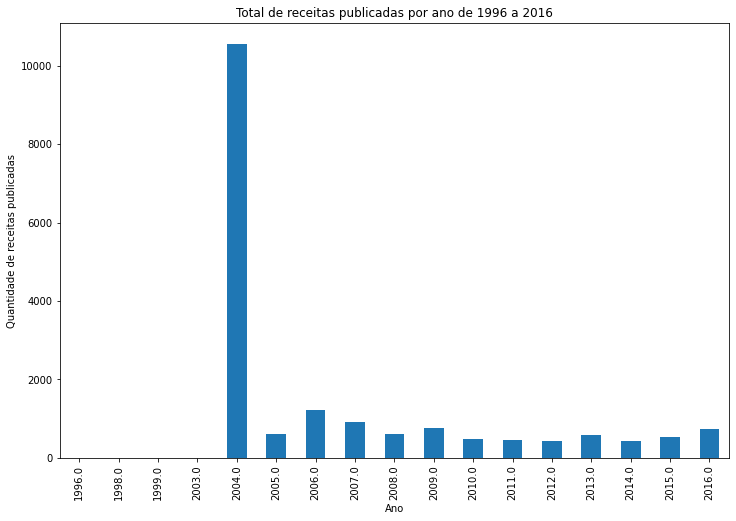

In [ ]:
df.groupby(df["date"].dt.year)["title"].count().plot(kind='bar', figsize=(12,8))

plt.title("Total de receitas publicadas por ano de 1996 a 2016")
plt.xlabel("Ano")
plt.ylabel("Quantidade de receitas publicadas")

In [ ]:
print(f"Total de receitas publicadas por ano:")
df.date.dt.year.value_counts()

Total de receitas publicadas por ano:


2004.0    10565
2006.0     1207
2007.0      923
2009.0      758
2016.0      732
2008.0      605
2005.0      603
2013.0      575
2015.0      519
2010.0      491
2011.0      445
2012.0      441
2014.0      420
1999.0        4
2003.0        3
1998.0        3
1996.0        1
Name: date, dtype: int64

In [ ]:
print(f"Total de receitas publicadas: {df.date.dt.year.count()}")

Total de receitas publicadas: 18295


**Comentários:**

* O gráfico evidencia que 2004 foi um ano bastante significativo em relação ao número de publicações de receitas, apresentando um valor muito alto em relação aos anos que antecedem e sucedem essa data. 

* Também se observa que, a partir de 2007, não houve nenhuma alteração significativa em relação ao número de publicações de receita, mantendo-se valores entre 923 e 420.

**Pergunta 02) Qual o somatório da quantidade de receitas publicadas em cada mês ao longo dos anos?**

Text(0, 0.5, 'Quantidade de receitas publicadas')

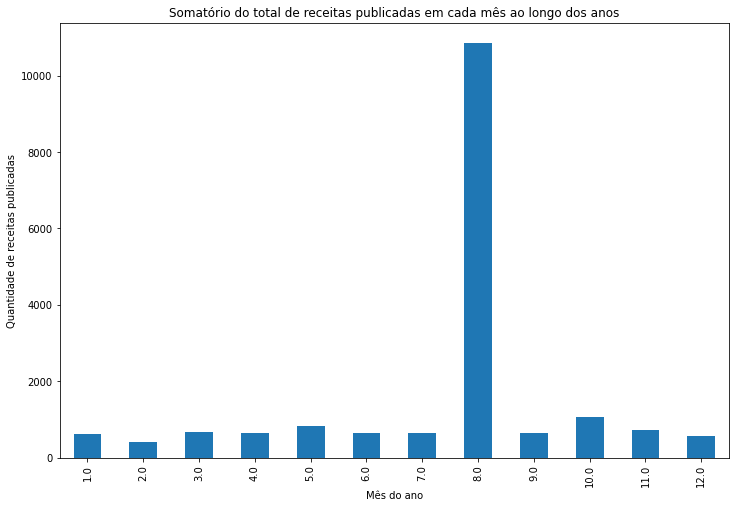

In [ ]:
df.groupby(df["date"].dt.month)["title"].count().plot(kind='bar', figsize=(12,8))

plt.title("Somatório do total de receitas publicadas em cada mês ao longo dos anos")
plt.xlabel("Mês do ano")
plt.ylabel("Quantidade de receitas publicadas")

In [ ]:
print(f"Somatório do total de receitas publicadas em cada mês ao longo dos anos:")
df.date.dt.month.value_counts()

Somatório do total de receitas publicadas em cada mês ao longo dos anos:


8.0     10846
10.0     1059
5.0       823
11.0      733
3.0       672
7.0       654
9.0       649
6.0       637
4.0       637
1.0       612
12.0      565
2.0       408
Name: date, dtype: int64

**Comentários:**

* O gráfico evidencia que no mês de agosto o número de publicações de receitas é consideravelmente maior que nos demais meses do ano.

* Também se observa que, no primeiro semestre do ano, a quantidade de publicações assume valores muito proximos.

**Pergunta 03) Quais as 30 receitas mais bem avaliadas?**

Text(0, 0.5, 'Quantidade de pontos (avaliação)')

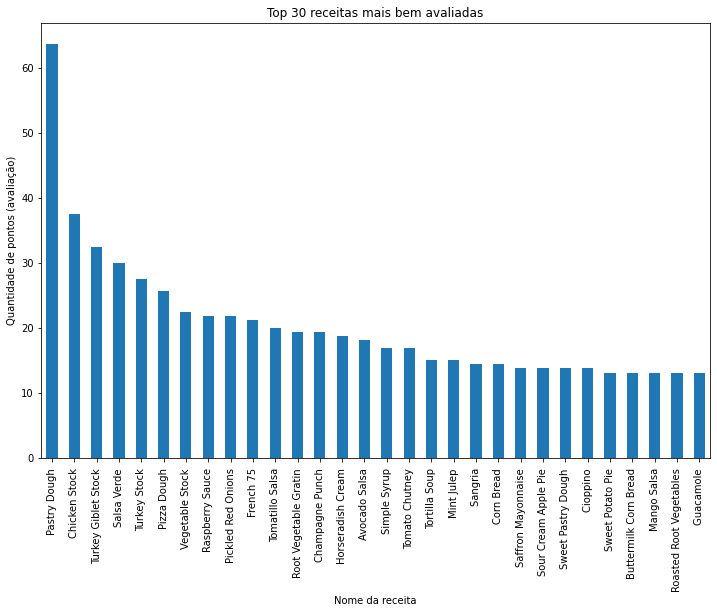

In [ ]:
df.groupby(['title']).rating.sum().sort_values(ascending=False)[:30].plot(kind='bar', figsize=(12,8))

plt.title("Top 30 receitas mais bem avaliadas")
plt.xlabel("Nome da receita")
plt.ylabel("Quantidade de pontos (avaliação)")

**Comentários:**

* Pastry Dough é a receita mais bem avaliada do dataset. Ela apresenta um número de pontos acumulados consideravelmente maior do que a receita Chicken Stock, segunda mais bem avaliada.


**Pergunta 04) Apresente um gráfico que mostre a relação entre a quantidade de cada nutriente (gordura, calorias, proteina e sódio) e a nota de avalição**

Text(0.5, 1.0, 'Relação: Quantidade de Sódio x Nota de avaliação')

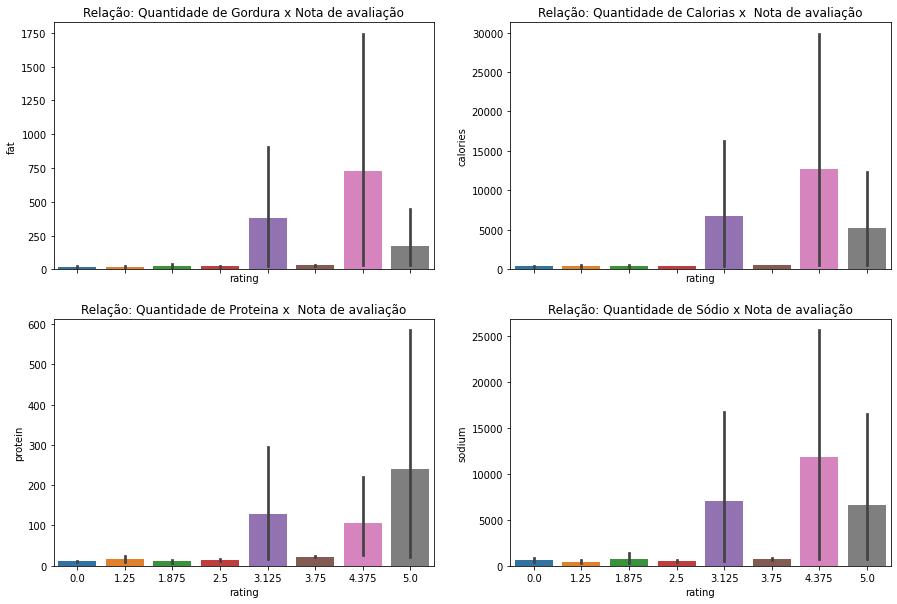

In [ ]:
n, nx = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
sns.barplot(x="rating", y="fat", data=df, ax=nx[0,0]).set_title("Relação: Quantidade de Gordura x Nota de avaliação")
sns.barplot(x="rating", y="calories", data=df, ax=nx[0,1]).set_title("Relação: Quantidade de Calorias x  Nota de avaliação")
sns.barplot(x="rating", y="protein", data=df, ax=nx[1,0]).set_title("Relação: Quantidade de Proteina x  Nota de avaliação")
sns.barplot(x="rating", y="sodium", data=df, ax=nx[1,1]).set_title("Relação: Quantidade de Sódio x Nota de avaliação")